Epoch 1/30, Loss: 0.6896900296211242
Epoch 2/30, Loss: 0.5760575532913208
Epoch 3/30, Loss: 0.4124492406845093
Epoch 4/30, Loss: 0.3783876359462738
Epoch 5/30, Loss: 0.320389461517334
Epoch 6/30, Loss: 0.29192390739917756
Epoch 7/30, Loss: 0.2356152504682541
Epoch 8/30, Loss: 0.2075669139623642
Epoch 9/30, Loss: 0.19740419387817382
Epoch 10/30, Loss: 0.16619646549224854
Epoch 11/30, Loss: 0.14659784883260726
Epoch 12/30, Loss: 0.13289665877819062
Epoch 13/30, Loss: 0.11362111866474152
Epoch 14/30, Loss: 0.10760754942893982
Epoch 15/30, Loss: 0.099014313519001
Epoch 16/30, Loss: 0.11222619563341141
Epoch 17/30, Loss: 0.07354115173220635
Epoch 18/30, Loss: 0.07055600583553315
Epoch 19/30, Loss: 0.05242664441466331
Epoch 20/30, Loss: 0.0646420419216156
Epoch 21/30, Loss: 0.06487297043204307
Epoch 22/30, Loss: 0.058071328699588774
Epoch 23/30, Loss: 0.04687086455523968
Epoch 24/30, Loss: 0.03726750090718269
Epoch 25/30, Loss: 0.034150009602308275
Epoch 26/30, Loss: 0.04692320190370083
Epoc

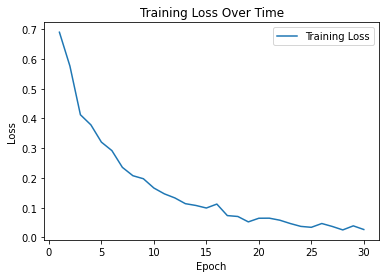

Accuracy on test set: 90.72%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
# transform = transforms.Compose([
# transforms.Resize((224,224)),
# transforms.ColorJitter(hue=.05, saturation=.05),
# transforms.RandomHorizontalFlip(),
# transforms.RandomRotation(20),
# transforms.ToTensor(),
# transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243,0.261))
# ])


train_dataset = datasets.ImageFolder(root="./your_dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="./your_dataset/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = models.resnet18(pretrained=True)
num_classes = 2
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 30
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss}")

torch.save(model.state_dict(), "your_model_weights.pth")

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


In [4]:
import torch
from torchvision import transforms, models
from PIL import Image
import os

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

model = models.resnet18(pretrained=False)
num_classes = 2  
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("your_model_weights.pth"))
model.eval()


pred_folder_path = "./test"


for file_name in os.listdir(pred_folder_path):
    file_path = os.path.join(pred_folder_path, file_name)


    input_image = Image.open(file_path).convert("RGB")
    input_tensor = transform(input_image)
    input_batch = input_tensor.unsqueeze(0)  

    with torch.no_grad():
        model.eval()

        input_batch = input_batch.to("cuda" if torch.cuda.is_available() else "cpu")

        model = model.to(input_batch.device)

        output = model(input_batch)

    _, predicted_class = torch.max(output, 1)

    class_names = ["apple", "tomato"]
    predicted_class_name = class_names[predicted_class.item()]

    print(f"Image: {file_name}, Predicted class: {predicted_class_name}")


Image: apple1.jpg, Predicted class: apple
Image: apple10.jpg, Predicted class: apple
Image: apple2.jpg, Predicted class: apple
Image: apple3.jpg, Predicted class: apple
Image: apple4.jpg, Predicted class: apple
Image: apple5.jpg, Predicted class: apple
Image: apple6.jpg, Predicted class: apple
Image: apple7.jpg, Predicted class: apple
Image: apple8.jpg, Predicted class: tomato
Image: apple9.jpg, Predicted class: tomato
Image: tomatao4.jpg, Predicted class: tomato
Image: tomato1.jpg, Predicted class: tomato
Image: tomato10.jpg, Predicted class: tomato
Image: tomato2.jpg, Predicted class: tomato
Image: tomato3.jpg, Predicted class: tomato
Image: tomato4.jpg, Predicted class: tomato
Image: tomato5.jpg, Predicted class: tomato
Image: tomato6.jpg, Predicted class: apple
Image: tomato7.jpg, Predicted class: tomato
Image: tomato8.jpg, Predicted class: tomato
Image: tomato9.jpg, Predicted class: tomato
